In [1]:
import pandas as pd
from datetime import time
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("Dataset1.csv")


/tmp/ipykernel_12150/3487286144.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset1.csv")


In [3]:
df.drop(columns=['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)

In [4]:
df.dropna(subset=['LATITUDE', 'LONGITUDE'])
df = df[df['LATITUDE']!=0]
df = df[df['LONGITUDE']!=0]

In [5]:
df.dropna(subset=['BOROUGH'])

Unnamed: 0  CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  \
1          1921573  2012-07-01      21:30   BROOKLYN    11237  40.694988   
2          1922185  2012-07-01      12:07   BROOKLYN    11206  40.708627   
3          1922186  2012-07-01       9:40     QUEENS    11369  40.767470   
4          1922187  2012-07-01       0:25     QUEENS    11375  40.732979   
5          1923957  2012-07-01      21:31  MANHATTAN    10036  40.763115   
...            ...         ...        ...        ...      ...        ...   
304274     1626453  2013-12-31      18:23   BROOKLYN  11215.0  40.667570   
304276     1631353  2013-12-31      16:30  MANHATTAN  10024.0  40.784975   
304278     1621044  2013-12-31      10:45  MANHATTAN  10033.0  40.851180   
304279     1621042  2013-12-31      16:15  MANHATTAN  10010.0  40.735390   
304280     1629281  2013-12-31      18:40      BRONX  10468.0  40.862735   

        LONGITUDE                   LOCATION  \
1      -73.907296  (40.6949882, -73.9072959)   
2      -73.945124  (40.7086265, -73.9451243)   
3      -73.881859  (40.7674704, -73.8818593)   
4      -73.844348  (40.7329792, -73.8443478)   
5      -73.999650  (40.7631147, -73.9996498)   
...           ...                        ...   
304274 -73.977716  (40.6675702, -73.9777158)   
304276 -73.982638   (40.7849752, -73.982638)   
304278 -73.939238  (40.8511796, -73.9392377)   
304279 -73.975110  (40.7353901, -73.9751095)   
304280 -73.903320   (40.862735, -73.9033202)   

                          ON STREET NAME                 CROSS STREET NAME  \
1       IRVING AVENUE                     WEIRFIELD STREET                   
2       MANHATTAN AVENUE                  SCHOLES STREET                     
3       23 AVENUE                         88 STREET                          
4       GRND CNTRL PARKWAY SR WEST        65 AVENUE                          
5       WEST SIDE HIGHWAY                 WEST 44 STREET                     
...                                  ...                               ...   
304274  8 AVENUE                          6 STREET                           
304276  WEST 79 STREET                    RIVERSIDE DRIVE                    
304278  WEST 181 STREET                   PINEHURST AVENUE                   
304279  AVENUE C                          EAST 23 STREET                     
304280  WEST FORDHAM ROAD                 GRAND AVENUE                       

        ... NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  \
1       ...                            0                          0   
2       ...                            0                          0   
3       ...                            0                          0   
4       ...                            0                          0   
5       ...                            0                          0   
...     ...                          ...                        ...   
304274  ...                            0                          0   
304276  ...                            0                          0   
304278  ...                            0                          0   
304279  ...                            0                          0   
304280  ...                            0                          0   

        NUMBER OF CYCLIST KILLED  NUMBER OF MOTORIST INJURED  \
1                              0                           0   
2                              0                           3   
3                              0                           0   
4                              0                           0   
5                              0                           0   
...                          ...                         ...   
304274                         0                           0   
304276                         0                           0   
304278                         0                           0   
304279                         0                           0   
304280                  

In [7]:
df3 = df
# columns = list(df3)
time1 = time(6,00,00)
time2 = time(12,00,00)
time3 = time(16,30,00)
time4 = time(22,00,00)
# dic = {}

# print(str(time1))
# for i,j in df3.iterrows():
#     if df3['CRASH TIME'][i]>=str(time4) or df3['CRASH TIME'][i]<str(time1):
#         dic[df3['COLLISION_ID'][i]] = "MID NIGHT"
#     elif df3['CRASH TIME'][i]>=str(time1) and df3['CRASH TIME'][i]<str(time2):
#         dic[df3['COLLISION_ID'][i]] = "MORNING"
#     elif df3['CRASH TIME'][i]>=str(time2) and df3['CRASH TIME'][i]<str(time3):
#         dic[df3['COLLISION_ID'][i]] = "AFTERNOON"
#     elif df3['CRASH TIME'][i] >= str(time3) and df3['CRASH TIME'][i]<str(time4):
#         dic[df3['COLLISION_ID'][i]] = "NIGHT"

def custom_time_func(row,time1,time2,time3,time4):
    if row['CRASH TIME']>=str(time4) or row['CRASH TIME']<str(time1):
        return "MID NIGHT"
    elif row['CRASH TIME']>=str(time1) and row['CRASH TIME']<str(time2):
        return "MORNING"
    elif row['CRASH TIME']>=str(time2) and row['CRASH TIME']<str(time3):
        return "AFTERNOON"
    elif row['CRASH TIME']>= str(time3) and row['CRASH TIME']<str(time4):
        return "NIGHT"

df3['CRASH_DAYTIME'] = df3.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)
df3

Unnamed: 0  CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  \
0          1922171  2012-07-01      12:44        NaN      NaN        NaN   
1          1921573  2012-07-01      21:30   BROOKLYN    11237  40.694988   
2          1922185  2012-07-01      12:07   BROOKLYN    11206  40.708627   
3          1922186  2012-07-01       9:40     QUEENS    11369  40.767470   
4          1922187  2012-07-01       0:25     QUEENS    11375  40.732979   
...            ...         ...        ...        ...      ...        ...   
304278     1621044  2013-12-31      10:45  MANHATTAN  10033.0  40.851180   
304279     1621042  2013-12-31      16:15  MANHATTAN  10010.0  40.735390   
304280     1629281  2013-12-31      18:40      BRONX  10468.0  40.862735   
304281     1629238  2013-12-31      11:30        NaN      NaN        NaN   
304282     1629247  2013-12-31      16:15        NaN      NaN  40.733687   

        LONGITUDE                   LOCATION  \
0             NaN                        NaN   
1      -73.907296  (40.6949882, -73.9072959)   
2      -73.945124  (40.7086265, -73.9451243)   
3      -73.881859  (40.7674704, -73.8818593)   
4      -73.844348  (40.7329792, -73.8443478)   
...           ...                        ...   
304278 -73.939238  (40.8511796, -73.9392377)   
304279 -73.975110  (40.7353901, -73.9751095)   
304280 -73.903320   (40.862735, -73.9033202)   
304281        NaN                        NaN   
304282 -73.923950    (40.7336872, -73.92395)   

                          ON STREET NAME                 CROSS STREET NAME  \
0       HORACE HARDING EXPRESSWAY         108 STREET                         
1       IRVING AVENUE                     WEIRFIELD STREET                   
2       MANHATTAN AVENUE                  SCHOLES STREET                     
3       23 AVENUE                         88 STREET                          
4       GRND CNTRL PARKWAY SR WEST        65 AVENUE                          
...                                  ...                               ...   
304278  WEST 181 STREET                   PINEHURST AVENUE                   
304279  AVENUE C                          EAST 23 STREET                     
304280  WEST FORDHAM ROAD                 GRAND AVENUE                       
304281                               NaN                               NaN   
304282                               NaN                               NaN   

        ... NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
0       ...                         0                         0   
1       ...                         0                         0   
2       ...                         0                         0   
3       ...                         0                         0   
4       ...                         0                         0   
...     ...                       ...                       ...   
304278  ...                         0                         0   
304279  ...                         0                         0   
304280  ...                         0                         0   
304281  ...                         0                         0   
304282  ...                         0                         0   

        NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED  \
0                                0                          0   
1                                0                          0   
2                                3                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
304278                           0                          0   
304279                           0                          0   
304280                           0                          0   
304281                           1                          0   
304282                           0                          0

In [13]:

df3 = df3.groupby('CRASH_DAYTIME').count()
df4 = df3['CRASH DATE']
df4
# dayTime = ['Product A', 'Product B', 
#          'Product C', 'Product D']
  
# # profit = [20, 30, 25, 20]
# # # explode = (0.1, 0, 0.1, 0) 
  
# plt.pie(df4,labels = df4.index,
#         autopct = '%1.1f%%',shadow = True,
#         startangle = 0,
#         wedgeprops = {"edgecolor":"black",
#                     'linewidth': 2,
#                     'antialiased': True})
  
# # Equal aspect ratio ensures
# # that pie is drawn as a circle.
# plt.axis('equal')  
  
# plt.show()

CRASH_DAYTIME
AFTERNOON    87398
MID NIGHT    78407
MORNING      41645
NIGHT        96832
Name: CRASH DATE, dtype: int64

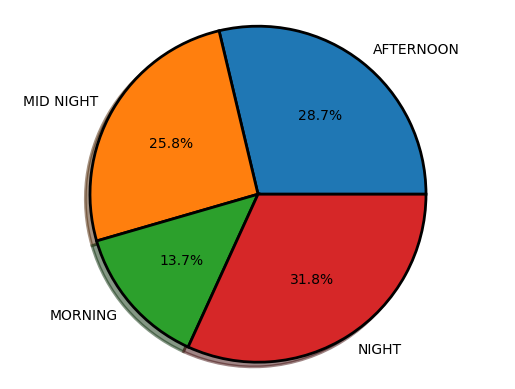

In [14]:
plt.pie(df4,labels = df4.index,
        autopct = '%1.1f%%',shadow = True,
        startangle = 0,
        wedgeprops = {"edgecolor":"black",
                    'linewidth': 2,
                    'antialiased': True})
plt.axis('equal')  
  
plt.show()

In [7]:


df2 = df.groupby('BOROUGH').count()
df2

Unnamed: 0  CRASH DATE  CRASH TIME  ZIP CODE  LATITUDE  \
BOROUGH                                                                 
BRONX               29279       29279       29279     29279     29278   
BROOKLYN            70327       70327       70327     70327     70327   
MANHATTAN           62301       62301       62301     62301     62301   
QUEENS              58449       58449       58449     58449     58449   
STATEN ISLAND       13197       13197       13197     13197     13197   

               LONGITUDE  LOCATION  ON STREET NAME  CROSS STREET NAME  \
BOROUGH                                                                 
BRONX              29278     29278           29173              29173   
BROOKLYN           70327     70327           70076              70076   
MANHATTAN          62301     62301           62064              62064   
QUEENS             58449     58449           57790              57790   
STATEN ISLAND      13197     13197           12785              12785   

               OFF STREET NAME  ...  NUMBER OF PEDESTRIANS KILLED  \
BOROUGH                         ...                                 
BRONX                      104  ...                         29279   
BROOKLYN                   251  ...                         70327   
MANHATTAN                  237  ...                         62301   
QUEENS                     659  ...                         58449   
STATEN ISLAND              412  ...                         13197   

               NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
BOROUGH                                                              
BRONX                              29279                     29279   
BROOKLYN                           70327                     70327   
MANHATTAN                          62301                     62301   
QUEENS                             58449                     58449   
STATEN ISLAND                      13197                     13197   

               NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED  \
BOROUGH                                                                
BRONX                               29279                      29279   
BROOKLYN                            70327                      70327   
MANHATTAN                           62301                      62301   
QUEENS                              58449                      58449   
STATEN ISLAND                       13197                      13197   

               CONTRIBUTING FACTOR VEHICLE 1  CONTRIBUTING FACTOR VEHICLE 2  \
BOROUGH                                                                       
BRONX                                  29265                          25477   
BROOKLYN                               70285                          62308   
MANHATTAN                              62209                          55101   
QUEENS                                 58409                          52492   
STATEN ISLAND                          13194                          11664   

               COLLISION_ID  VEHICLE TYPE CODE 1  VEHICLE TYPE CODE 2  
BOROUGH                                                                
BRONX                 29279                29276                25629  
BROOKLYN              70327                70324                62886  
MANHATTAN             62301                62208                55952  
QUEENS                58449                58446                52902  
STATEN ISLAND         13197                13197                11693  

[5 rows x 23 columns]

Unnamed: 0    CRASH DATE    CRASH TIME      ZIP CODE      LATITUDE  \
count      5.000000      5.000000      5.000000      5.000000      5.000000   
mean   46710.600000  46710.600000  46710.600000  46710.600000  46710.400000   
std    24318.753151  24318.753151  24318.753151  24318.753151  24318.932353   
min    13197.000000  13197.000000  13197.000000  13197.000000  13197.000000   
25%    29279.000000  29279.000000  29279.000000  29279.000000  29278.000000   
50%    58449.000000  58449.000000  58449.000000  58449.000000  58449.000000   
75%    62301.000000  62301.000000  62301.000000  62301.000000  62301.000000   
max    70327.000000  70327.000000  70327.000000  70327.000000  70327.000000   

          LONGITUDE      LOCATION  ON STREET NAME  CROSS STREET NAME  \
count      5.000000      5.000000        5.000000           5.000000   
mean   46710.400000  46710.400000    46377.600000       46377.600000   
std    24318.932353  24318.932353    24302.166659       24302.166659   
min    13197.000000  13197.000000    12785.000000       12785.000000   
25%    29278.000000  29278.000000    29173.000000       29173.000000   
50%    58449.000000  58449.000000    57790.000000       57790.000000   
75%    62301.000000  62301.000000    62064.000000       62064.000000   
max    70327.000000  70327.000000    70076.000000       70076.000000   

       OFF STREET NAME  ...  NUMBER OF PEDESTRIANS KILLED  \
count         5.000000  ...                      5.000000   
mean        332.600000  ...                  46710.600000   
std         212.660057  ...                  24318.753151   
min         104.000000  ...                  13197.000000   
25%         237.000000  ...                  29279.000000   
50%         251.000000  ...                  58449.000000   
75%         412.000000  ...                  62301.000000   
max         659.000000  ...                  70327.000000   

       NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
count                   5.000000                  5.000000   
mean                46710.600000              46710.600000   
std                 24318.753151              24318.753151   
min                 13197.000000              13197.000000   
25%                 29279.000000              29279.000000   
50%                 58449.000000              58449.000000   
75%                 62301.000000              62301.000000   
max                 70327.000000              70327.000000   

       NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED  \
count                    5.000000                   5.000000   
mean                 46710.600000               46710.600000   
std                  24318.753151               24318.753151   
min                  13197.000000               13197.000000   
25%                  29279.000000               29279.000000   
50%                  58449.000000               58449.000000   
75%                  62301.000000               62301.000000   
max                  70327.000000               70327.000000   

       CONTRIBUTING FACTOR VEHICLE 1  CONTRIBUTING FACTOR VEHICLE 2  \
count                       5.000000                       5.000000   
mean                    46672.400000                   41408.400000   
std                     24292.537122                   21712.125651   
min                     13194.000000                   11664.000000   
25%                     29265.000000                   25477.000000   
50%                     58409.000000                   52492.000000   
75%                     62209.000000                   55101.000000   
max                     70285.000000                   62308.000000   

       COLLISION_ID  VEHICLE TYPE CODE 1  VEHICLE TYPE CODE 2  
count      5.000000             5.000000             5.000000  
mean   46710.600000         46690.200000         41812.400000  
std    24318.753151         24303.324159         22000.481956  
min    13197.000000         13197.000000         11693.000000  
25

In [20]:



df = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != "Unspecified"]


In [21]:
fig = px.scatter_mapbox(df, lat='LATITUDE', lon='LONGITUDE', color='CONTRIBUTING FACTOR VEHICLE 1', zoom=12, height=1200, width=1500)
fig.update_layout(mapbox_style = "open-street-map")
fig.show()

In [22]:
fig = px.scatter_mapbox(df, lat='LATITUDE', lon='LONGITUDE', color='BOROUGH', zoom=12, height=1200, width=1500)
fig.update_layout(mapbox_style = "open-street-map")
fig.show()